⊕ [pandas可视化（3）【官方文档解读】-- 箱线图](https://ask.hellobi.com/blog/wangdawei/9051)


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib.style.use('ggplot')#使用ggplot样式
%matplotlib inline

In [2]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.head()
# 注：使用numpy产生一个10行5列的矩阵，矩阵内的元素是随机产生的标准正态分布数字
# 然后将矩阵转为df，给这五列数据栏位命名为A、B、C、D、E，并显示其前五行观察

,A,B,C,D,E
0,0.881070,0.656573,0.564511,0.068263,0.141643
1,0.935752,0.919120,0.057192,0.980156,0.509755
2,0.306083,0.601246,0.750715,0.229630,0.455051
3,0.549248,0.646221,0.400448,0.094800,0.689724
4,0.081710,0.540047,0.336035,0.207301,0.642059


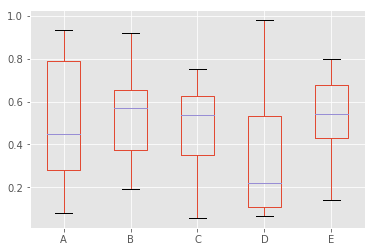

In [3]:
df.plot.box()
# 注：绘制箱线图

注：这里有A~E五个箱线图放在一张图，理解为5次试验，每次的即为其对应列中的十行（10个数字）的箱线图

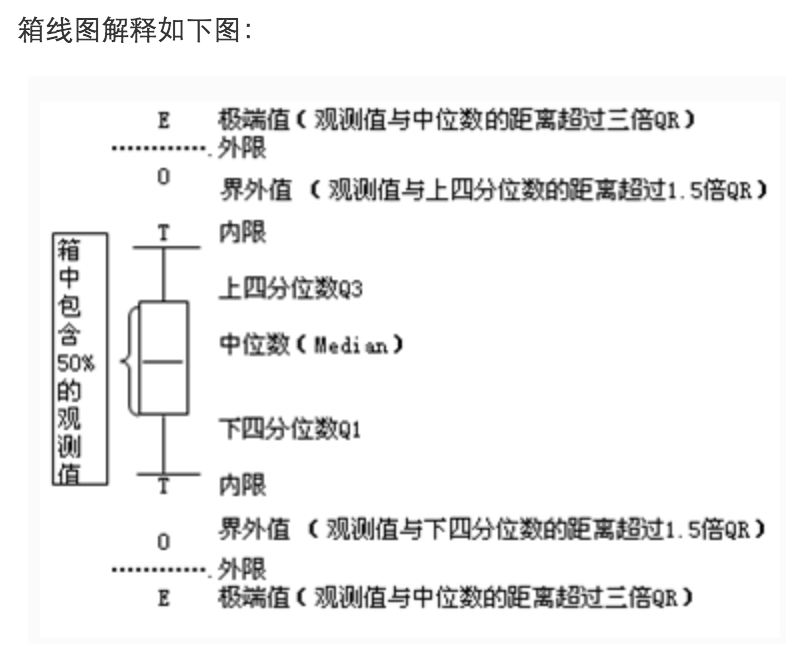

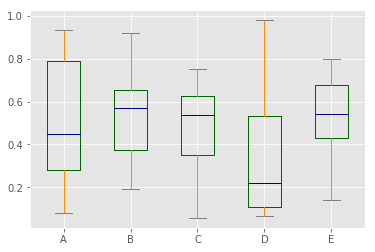

In [4]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
             medians='DarkBlue', caps='Gray')
df.plot.box(color=color, sym='r+')
# 注：绘制箱线图，这里增加了箱线图每部分线条颜色的设置，至于sym官方解释是：specify fliers style
# 直译为：指定传单风格，我们暂且可以认为是绘图的某种风格，
# 我把这个参数去掉绘图发现没什么区别

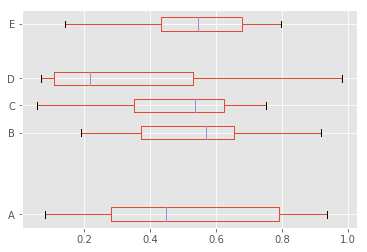

In [5]:
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8])
# 注：这里vert = False绘制水平箱线图，并且将幕布竖直方向分为8块等大小区域
# 将5个箱线图从下到上依次画在1、4、5、6、8五个位置

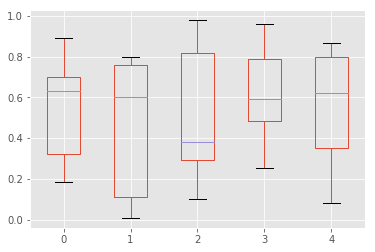

In [6]:
# 可以使用DataFrame.boxplot来绘制boxplot的界面

df = pd.DataFrame(np.random.rand(10,5))
plt.figure()
bp = df.boxplot()
# 注：使用和之前产生df一样的方法产生df，然后用df的boxplot方法画箱线图

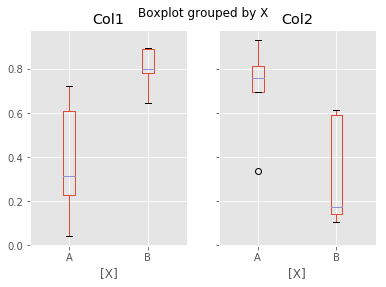

In [7]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
plt.figure()
bp = df.boxplot(by='X')
# 注：在原有的df上增加一栏X，其中包含A，B两种分类，最后根据这种分类分别对col1和col2画箱线图

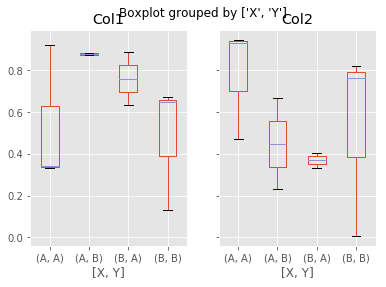

In [8]:
df = pd.DataFrame(np.random.rand(10,3), columns=['Col1', 'Col2', 'Col3'])
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])
plt.figure();
bp = df.boxplot(column=['Col1','Col2'], by=['X','Y'])
# 注：这里传入两个分类依据，所以2X2有四种分类组合

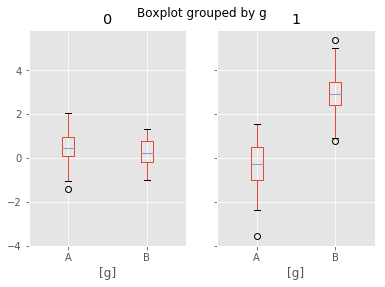

In [9]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box['g'] = np.random.choice(['A', 'B'], size=50)
df_box.loc[df_box['g'] == 'B', 1] += 3
bp = df_box.boxplot(by='g')
# 注：这段比较难理解，我们分步理解：

In [11]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box.head()
# 注：这里使用某种随机数种子产生器，随机产生一个50行2列的df

,0,1
0,0.471435,-1.190976
1,1.432707,-0.312652
2,-0.720589,0.887163
3,0.859588,-0.636524
4,0.015696,-2.242685


In [12]:
df_box['g'] = np.random.choice(['A', 'B'], size=50)
df_box.head()
# 注：然后加一栏g，随机分为A,B两类

,0,1,g
0,0.471435,-1.190976,A
1,1.432707,-0.312652,A
2,-0.720589,0.887163,B
3,0.859588,-0.636524,A
4,0.015696,-2.242685,B


In [13]:
df_box.loc[df_box['g'] == 'B', 1] += 3
df_box.head()
# 注：定位到所有g栏属于B的行和第二列（索引是1），将其加3


,0,1,g
0,0.471435,-1.190976,A
1,1.432707,-0.312652,A
2,-0.720589,3.887163,B
3,0.859588,-0.636524,A
4,0.015696,0.757315,B


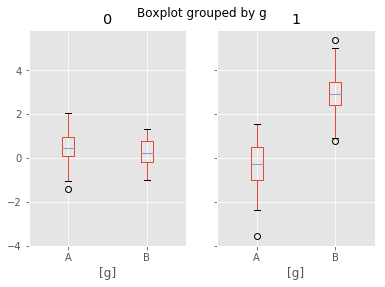

In [14]:
bp = df_box.boxplot(by='g')
# 注：最后按照g栏分类画图，像之前两张图一样

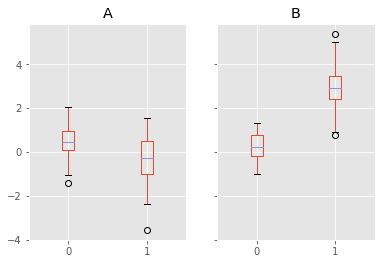

In [16]:
# 和以下绘图代码注意对比：
bp = df_box.groupby('g').boxplot()
# 注：by有分开的意思，groupby有整合的意思